# **Data Normalization Techniques**


## Objectives


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [ ]:
## Write your code here
duplicated_rows=df.duplicated().sum()
print('duplicated rows are -------------------------->',duplicated_rows)

duplicate_rows = df[df.duplicated(keep=False)]
print("First few duplicate rows:")
print(duplicate_rows.head())

duplicated rows are --------------------------> 0
First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [ ]:
## Write your code here
print(df['CodingActivities'].isnull().value_counts())

CodingActivities
False    54466
True     10971
Name: count, dtype: int64


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [ ]:
## Write your code here
print(df['CodingActivities'].dtype)
mode_val = df['CodingActivities'].mode()[0]
df['CodingActivities'] = df['CodingActivities'].fillna(mode_val)

object


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


In [ ]:
df.dropna(subset=['ConvertedCompYearly'],inplace=True)
df['ConvertedCompYearly'].isnull().sum()

np.int64(0)

### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [ ]:
## Write your code here

# Step 1: Identify compensation-related columns (keyword match)
comp_cols = [col for col in df.columns if 'comp' in col.lower() or 'salary' in col.lower()]
print("Compensation-related columns found:")
print(comp_cols)

# Step 2: Check for 'ConvertedCompYearly'
if 'ConvertedCompYearly' in df.columns:
    print("\n✅ 'ConvertedCompYearly' column found. Ready for use in normalization.")

    # Step 3: Check basic info and missing values
    print("\nSummary before normalization:")
    print(df['ConvertedCompYearly'].describe())
    print("\nMissing values:", df['ConvertedCompYearly'].isnull().sum())

else:
    print("\n⚠️ 'ConvertedCompYearly' not found. Consider choosing from the following candidates:")
    for col in comp_cols:
        print(f"- {col}")
df['ConvertedCompYearly'].value_counts()

Compensation-related columns found:
['CompTotal', 'AIComplex', 'ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore']

✅ 'ConvertedCompYearly' column found. Ready for use in normalization.

Summary before normalization:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Missing values: 0


,count
ConvertedCompYearly,
64444.0,321
53703.0,308
75184.0,230
85925.0,226
107406.0,208
...,...
105500.0,1
60863.0,1
98599.0,1


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [ ]:
## Write your code here
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

     ConvertedCompYearly  ConvertedCompYearly_MinMax
72                7322.0                    0.000450
374              30074.0                    0.001850
379              91295.0                    0.005616
385              53703.0                    0.003303
389             110000.0                    0.006766


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [ ]:
## Write your code here
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()

df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())

     ConvertedCompYearly  ConvertedCompYearly_Zscore
72                7322.0                   -0.422117
374              30074.0                   -0.300290
379              91295.0                    0.027521
385              53703.0                   -0.173767
389             110000.0                    0.127678


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


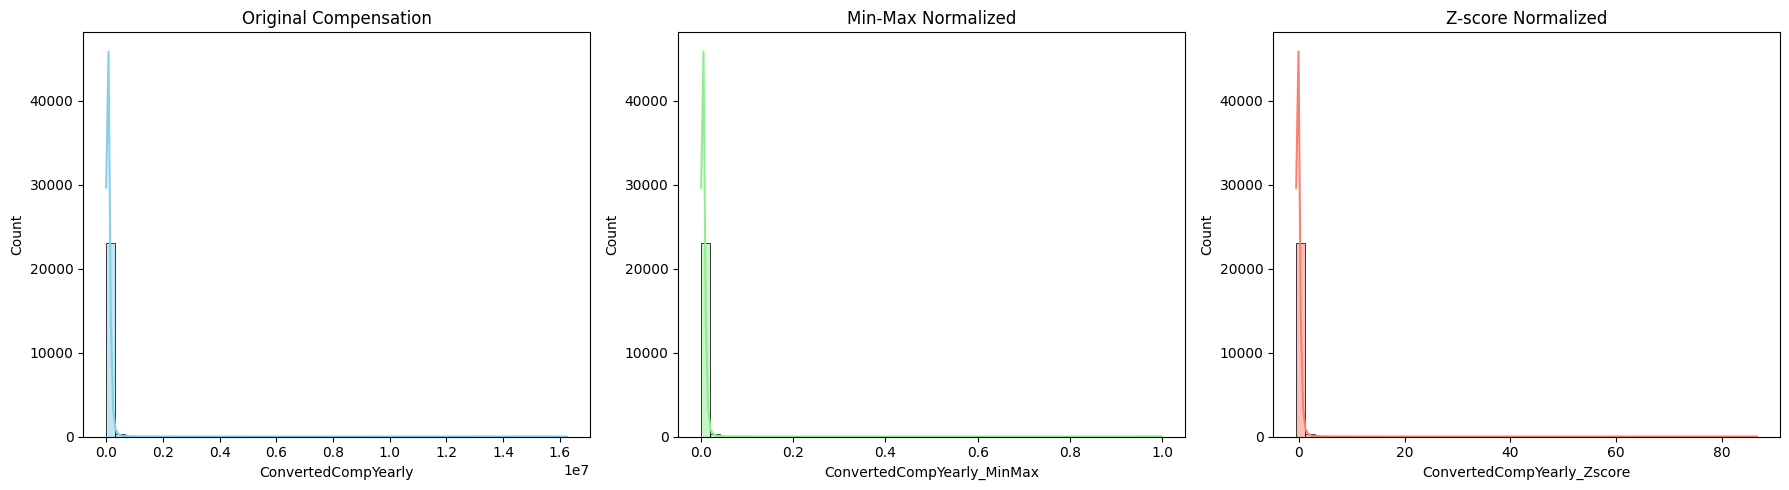

In [ ]:
## Write your code here
import seaborn as sns
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Original Compensation')
plt.xlabel('ConvertedCompYearly')

# Min-Max
plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'], bins=50, kde=True, color='lightgreen')
plt.title('Min-Max Normalized')
plt.xlabel('ConvertedCompYearly_MinMax')

# Z-score
plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], bins=50, kde=True, color='salmon')
plt.title('Z-score Normalized')
plt.xlabel('ConvertedCompYearly_Zscore')

plt.tight_layout()
plt.show()